In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

In [5]:
# csv 경로
path = os.path.join(os.getcwd(), 'german_credit_data.csv')

# 데이터 프레임으로 불러오기
df_origin = pd.read_csv(path, index_col='Unnamed: 0')

# 데이터 정보, 결측값, 샘플을 출력합니다.
print(df_origin.info())
print(df_origin.isnull().sum())
df_origin.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB
None
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good


In [9]:
# 정제 작업이 수행될 dataframe 을 df_claen으로 정의합니다. 
df_clean = df_origin

# 'Saving accounts' ,'Checking account' 변수에 있는 결측값을 `Others`로 대체합니다.
df_clean['Saving accounts'] = df_origin['Saving accounts'].fillna('Others')
df_clean['Checking account'] = df_origin['Checking account'].fillna('Others')

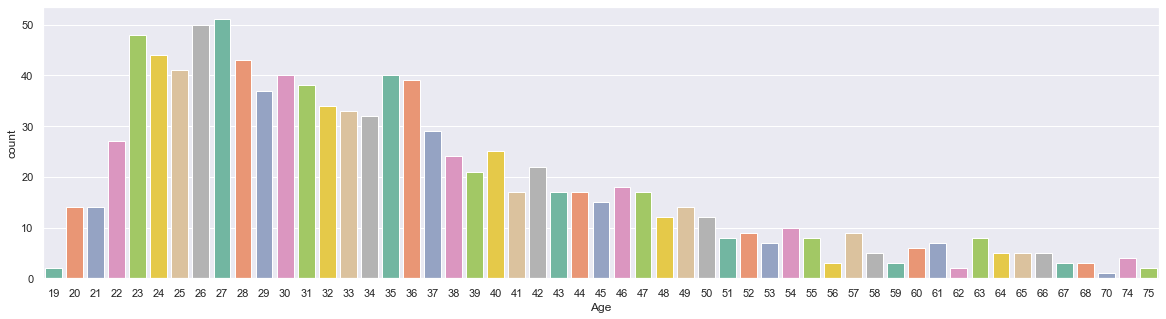

In [10]:
plt.figure(figsize=(20,5))

# 나이 분포 확인
sns.set(style='darkgrid')
ax = sns.countplot(x='Age', data=df_clean, palette="Set2")

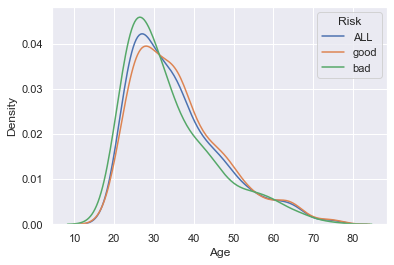

In [11]:
sns.distplot(df_clean['Age'], hist=False, label='ALL')
sns.distplot(df_clean[df_clean['Risk']=='good']['Age'], hist=False, label='good')
sns.distplot(df_clean[df_clean['Risk']=='bad']['Age'], hist=False, label='bad')

plt.legend(title='Risk')
plt.show()

male      690
female    310
Name: Sex, dtype: int64

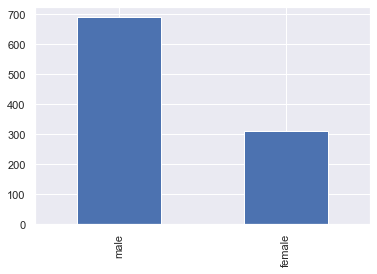

In [12]:
# 성별에 관한 분포 확인
df_clean['Sex'].value_counts().plot(kind='bar')

df_clean['Sex'].value_counts()

In [13]:
def multiplot(columns):
    df_multi = pd.DataFrame({'ALL': df_clean[columns].value_counts().sort_index().values,
                          'good': df_clean[df_clean['Risk']=='good'][columns].value_counts().sort_index().values,
                          'bad': df_clean[df_clean['Risk']=='bad'][columns].value_counts().sort_index().values
                          }, index=df_clean[columns].value_counts().sort_index().index)

    df_multi.plot(kind='bar')
    plt.legend(title='Risk')
    plt.show()

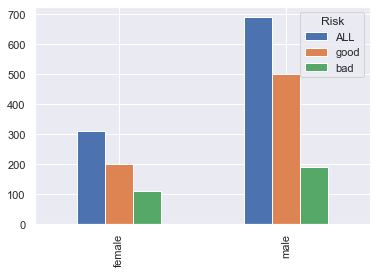

In [15]:
# 성별을 target에 관하여 분할
multiplot('Sex')

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

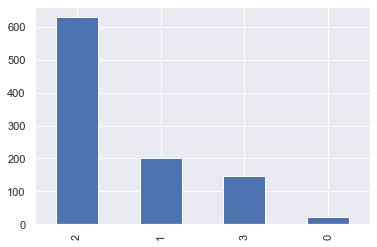

In [16]:
# 직업에 관한 분포
df_clean['Job'].value_counts().plot(kind='bar')

df_clean['Job'].value_counts()

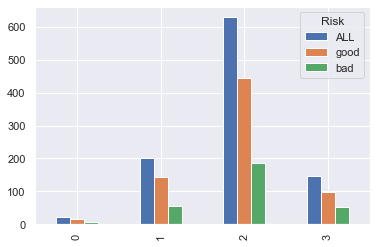

In [17]:
# 직업을 target에 관하여 분할
multiplot('Job')

own     713
rent    179
free    108
Name: Housing, dtype: int64

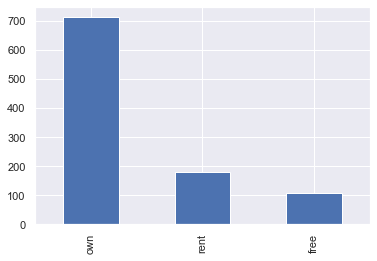

In [18]:
# 주택 소유 유무 관한 분포
df_clean['Housing'].value_counts().plot(kind='bar')

df_clean['Housing'].value_counts()

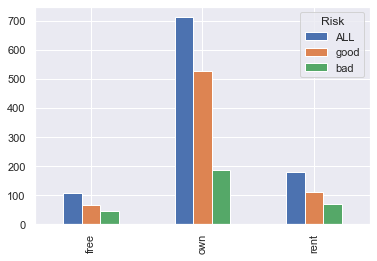

In [19]:
# 주택 소유를 target에 관하여 분할
multiplot('Housing')

little        603
Others        183
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

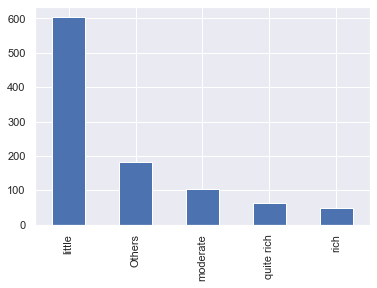

In [20]:
# 저장된 계좌 관한 분포
df_clean['Saving accounts'].value_counts().plot(kind='bar')

df_clean['Saving accounts'].value_counts()

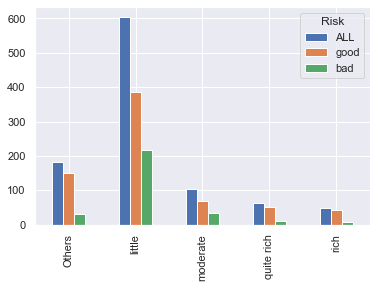

In [21]:
# 저금된 계좌를 target에 관하여 분할
multiplot('Saving accounts')

Others      394
little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

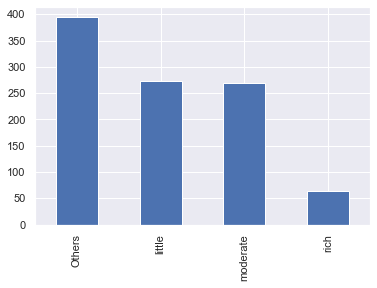

In [22]:
# 체크카드 관한 분포
df_clean['Checking account'].value_counts().plot(kind='bar')

df_clean['Checking account'].value_counts()

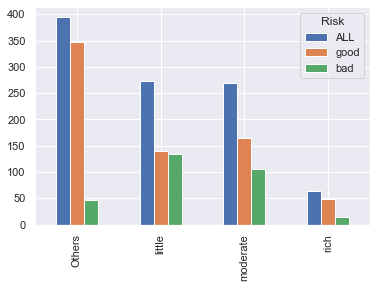

In [23]:
# 체크카드를 target에 관하여 분할
multiplot('Checking account')

car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: Purpose, dtype: int64

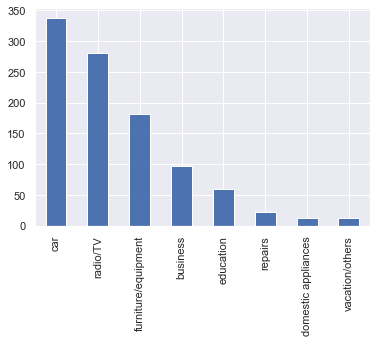

In [29]:
# Purpose 분호 확인
df_clean['Purpose'].value_counts().plot(kind='bar')

df_clean['Purpose'].value_counts()

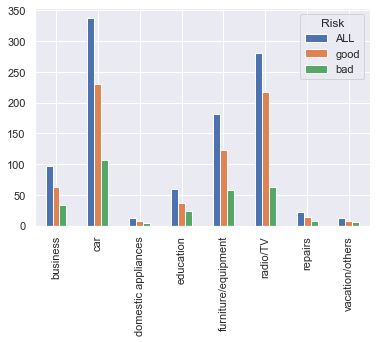

In [30]:
#  Purpose를 target에 관하여 분할
multiplot('Purpose')

good    700
bad     300
Name: Risk, dtype: int64

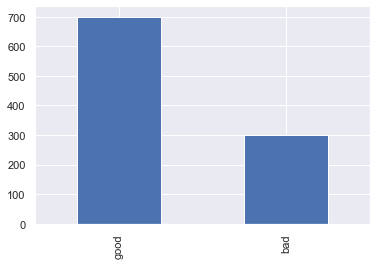

In [31]:
# target 분포 확인
df_clean['Risk'].value_counts().plot(kind='bar')

df_clean['Risk'].value_counts()

### 수치형 데이터 분포 확인

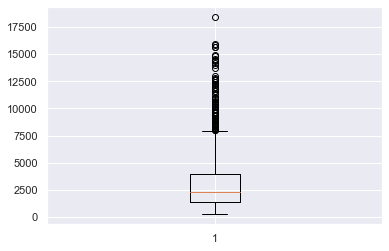

In [25]:
# 신용계좌 분포 확인
plt.boxplot(df_clean['Credit amount'])
plt.show()

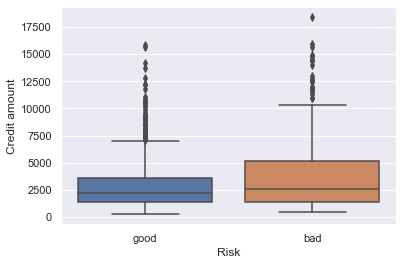

In [26]:
# target으로 분할
sns.boxplot(x='Risk', y='Credit amount', data=df_clean)
plt.show()

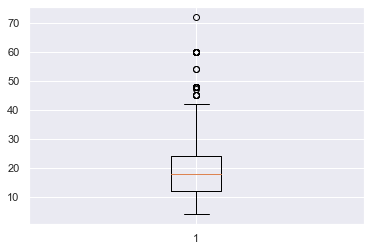

In [27]:
# Duration 분포 확인
plt.boxplot(df_clean['Duration'])
plt.show()

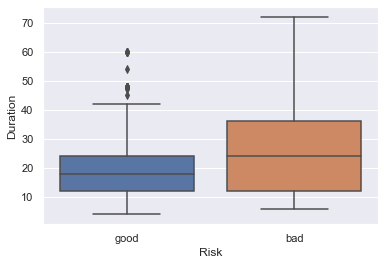

In [28]:
# target으로 분할
sns.boxplot(x='Risk', y='Duration', data=df_clean)
plt.show()